In [1]:
import multiprocessing
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

import sncosmo

In [2]:
def show_multi_filter_light_curve(t, colors, n_factor = None, conv='.'):
   
    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    
    #print indices
    for i in range(0, len(indices)-1):
        
        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()

In [3]:
lienObj = glob.glob("/datadec/cppm/jpreyes/CFHT_Production/light_curves_corrected_2/*.dat")

In [4]:
def f(obj):
    table = ascii.read(obj)
    return table

In [5]:
import multiprocessing
try:
    pool = multiprocessing.Pool()
    res =  pool.map(f, lienObj)
finally:
    pool.close()

In [6]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#elems = re.findall('^(.*?D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
elems = re.findall('^(05D3.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
f.close()

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
f.close()

In [7]:
snls_array = []
for sn in elems:

        c = coord.SkyCoord(sn[1], unit=(u.hourangle, u.deg))
        
        m = re.findall('^'+str(sn[0])+'\\|(r|g|z|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)
        
        snls_lc = DSTools.build_light_curve_from_snls_file_2(m, c, sn[0], sn[-1])

        if len(m)>0:
            #print sn[0], c.ra.deg, c.dec.deg

            #plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
            #show_multi_filter_light_curve(snls_lc, snls_colors)
            plt.show()
            snls_array.append(snls_lc)

print("total of sn:" + str(len(snls_array)))

total of sn:33


In [8]:
s_candidates = res
matches_sc = DSTools.match_with_lc(snls_array, s_candidates)

32736
48126
48317
13498
15992
36317
37869
20653
3459
3581
11933
11953
20588
22927
6025
50319
51994
20727
23191
33376
19091
43142
12284
14790
44834
46889
48883
17098
30256
30355
32998
33083
10289
26370
27463
17147
17228
17247
17725
46228
11847
34979
35099
36593
36611
34082
11236
12973
12988
13019
13025
20372
52


05D3ax


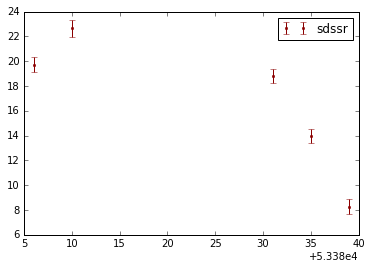

05D3cf


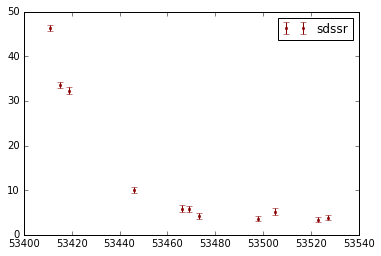

05D3cf


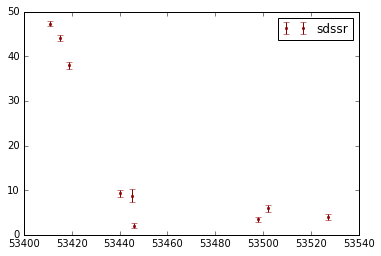

05D3ci


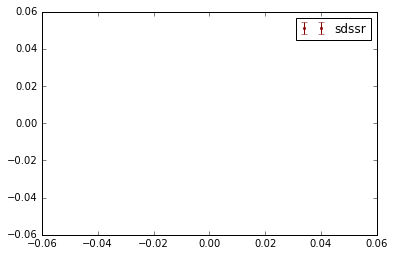

05D3ci


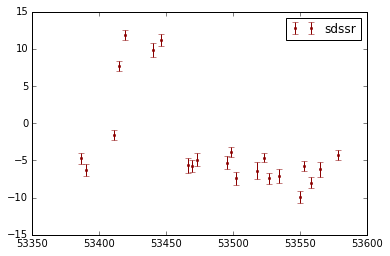

05D3cq


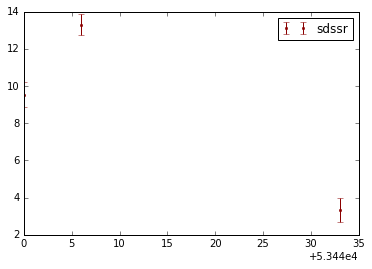

05D3cq


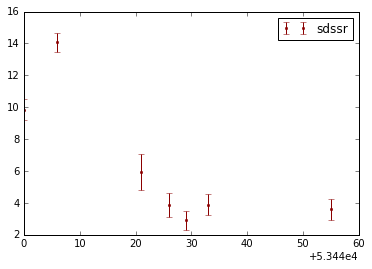

05D3cx


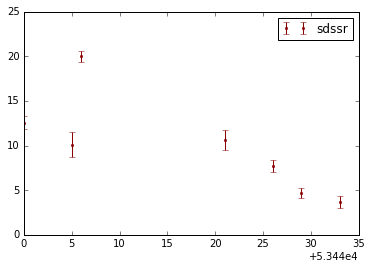

05D3dd


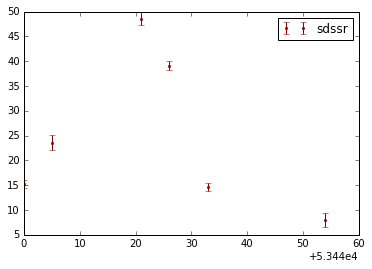

05D3dd


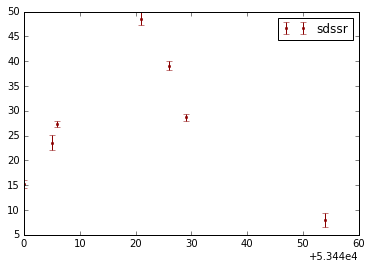

05D3dd


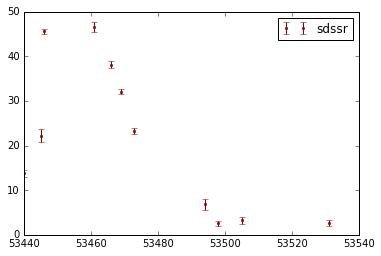

05D3dd


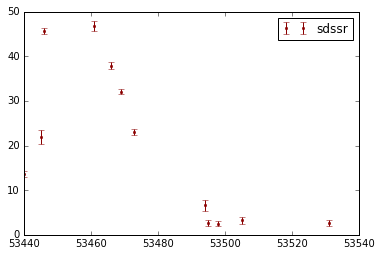

05D3dh


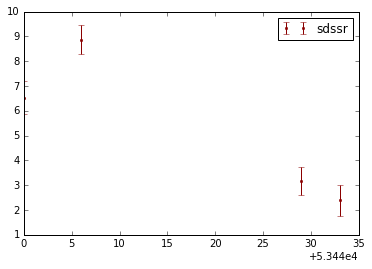

05D3dh


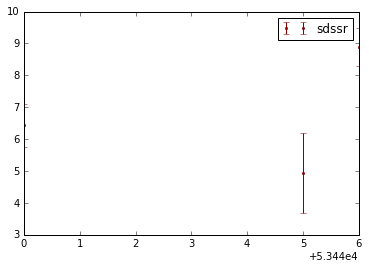

05D3gp


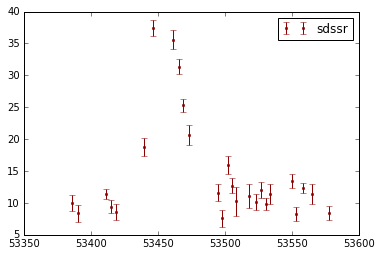

05D3gy


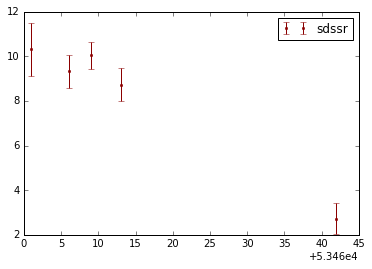

05D3gy


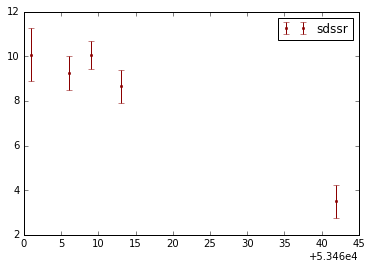

05D3ha


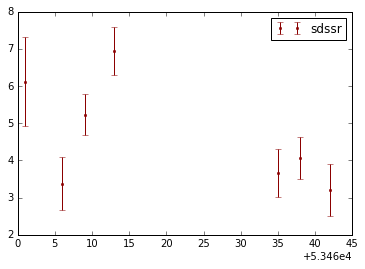

05D3ha


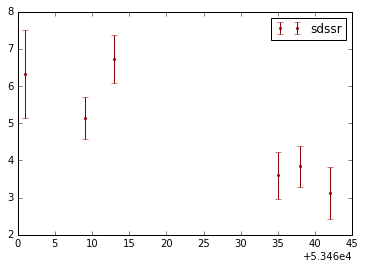

05D3hh


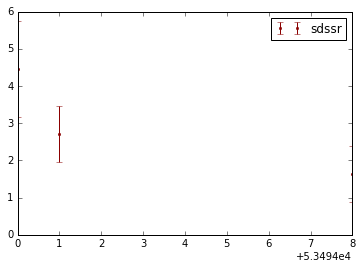

05D3hs


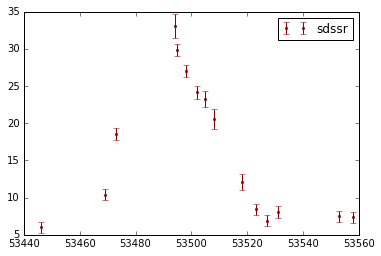

05D3ht


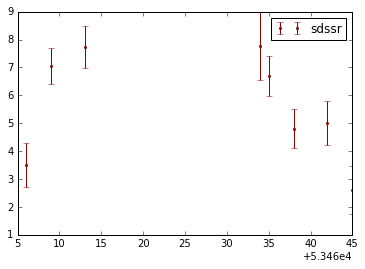

05D3jb


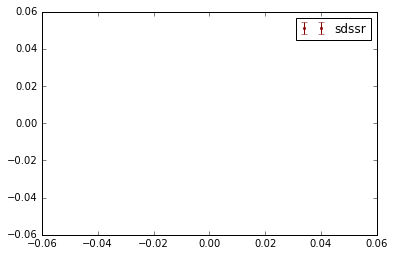

05D3jb


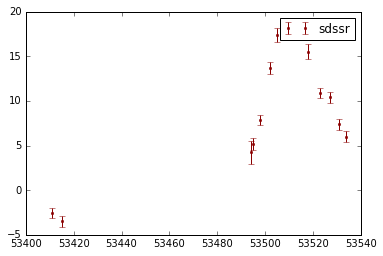

05D3jh


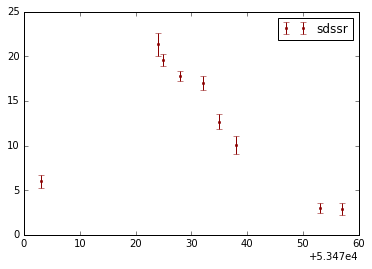

05D3jh


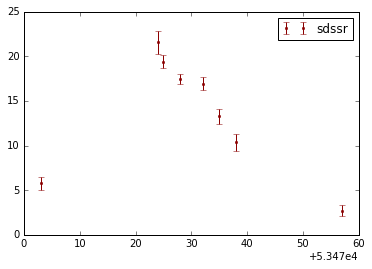

05D3jk


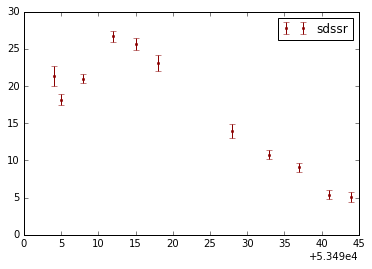

05D3jq


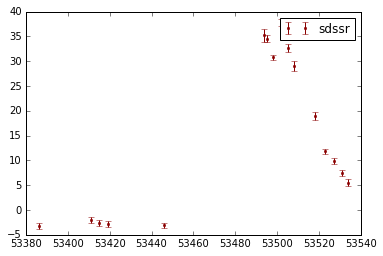

05D3jr


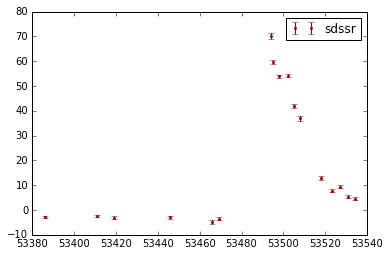

05D3jr


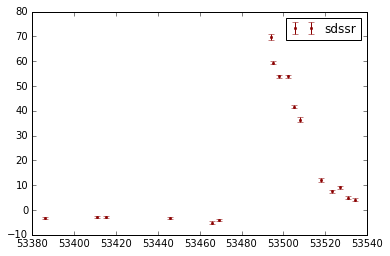

05D3jr


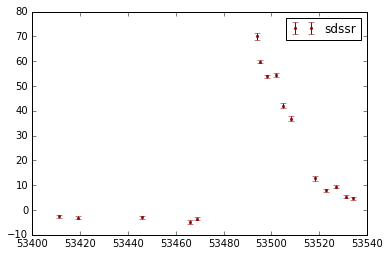

05D3jr


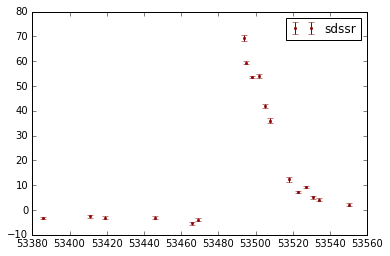

05D3km


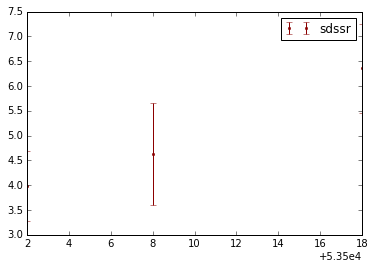

05D3kp


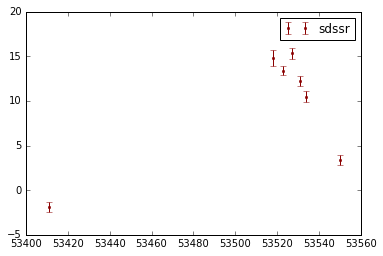

05D3kt


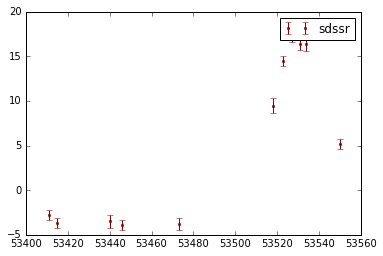

05D3kx


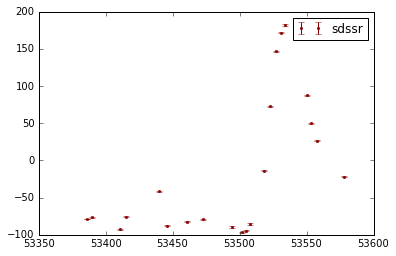

05D3kx


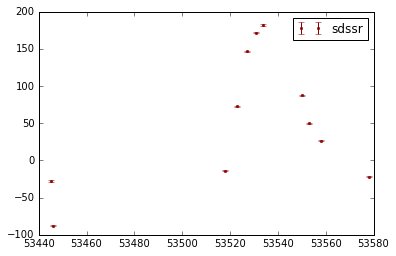

05D3kx


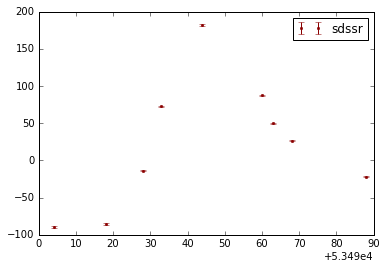

05D3la


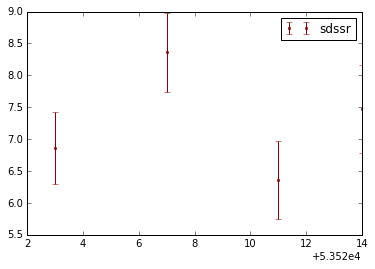

05D3lb


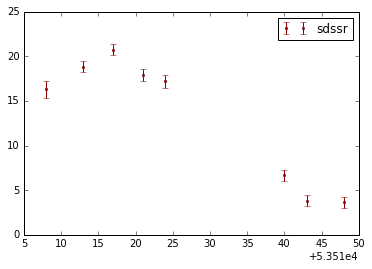

05D3lc


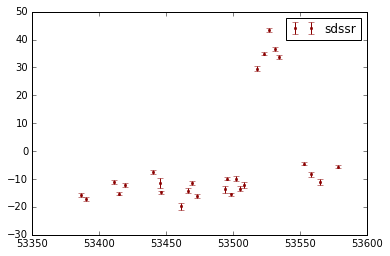

05D3mh


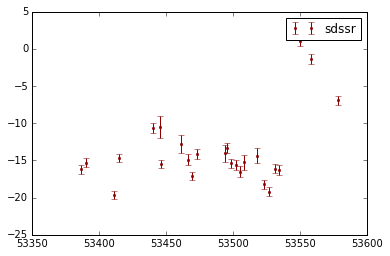

05D3mh


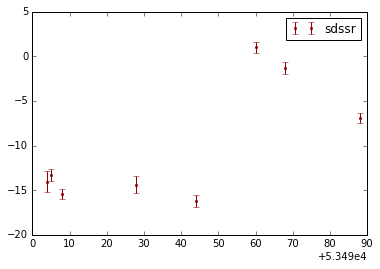

05D3mn


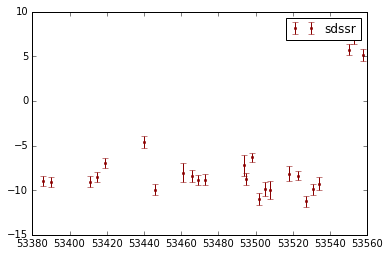

05D3mn


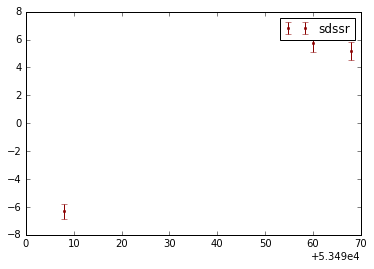

05D3mq


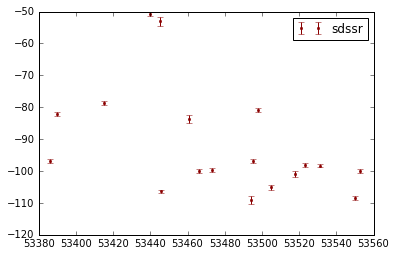

05D3mx


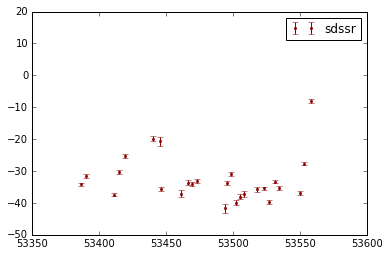

05D3mx


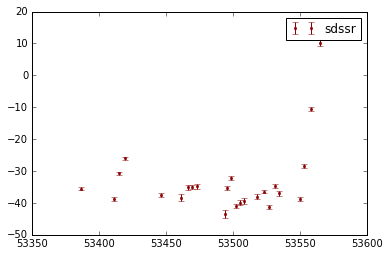

05D3mx


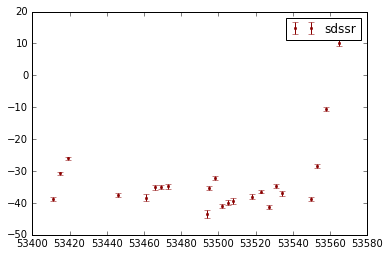

05D3mx


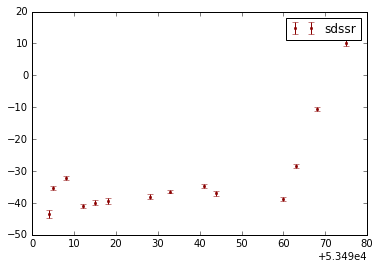

05D3mx


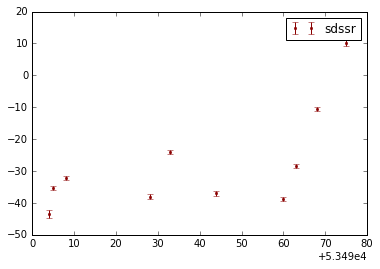

05D3ne


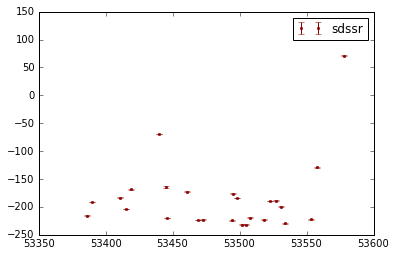

In [9]:
for control, match in matches_sc:
    print control[0]["id"]
    show_multi_filter_light_curve(match, snls_colors)
    plt.show()


In [10]:
count = 0
last = ""
for control, match in matches_sc:
    if control[0]["id"] != last:
        count+=1
    last = control[0]["id"]
print count

30
